<a href="https://colab.research.google.com/github/roshanbajaj99/Images_label_prediction/blob/main/Image_label_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

Files already downloaded and verified
Files already downloaded and verified


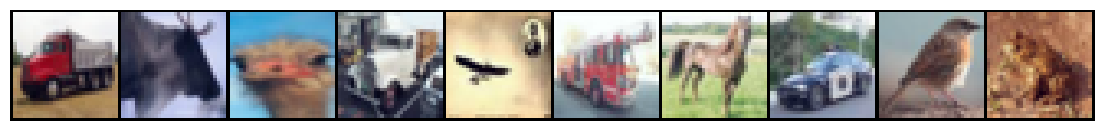

truck deer bird truck airplane truck horse automobile bird frog 

In [ ]:
#Defining plotting settings
plt.rcParams['figure.figsize'] = 14, 6

mean = [0.4914, 0.4822, 0.4465]
std = [0.2470, 0.2435, 0.2616]

#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = mean,
                                     std = std)])

#Downloading the CIFAR10 dataset into train and test sets
train_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/train", train=True,
    transform=normalize_transform,
    download=True)



test_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/test", train=False,
    transform=normalize_transform,
    download=True)

#Generating data loaders from the corresponding datasets
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)  # MMMR --- Shuffle needs to be true.
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

#Plotting 10 images from the 1st batch
dataiter = iter(train_loader)
images, labels = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:10], normalize=True, padding=1, nrow=10).numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()

# Printing Labels
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
labels_now = labels[:10]
for x in labels_now.tolist():
  print(label_names[x], end=" ")

Text(0, 0.5, 'Number of training instances')

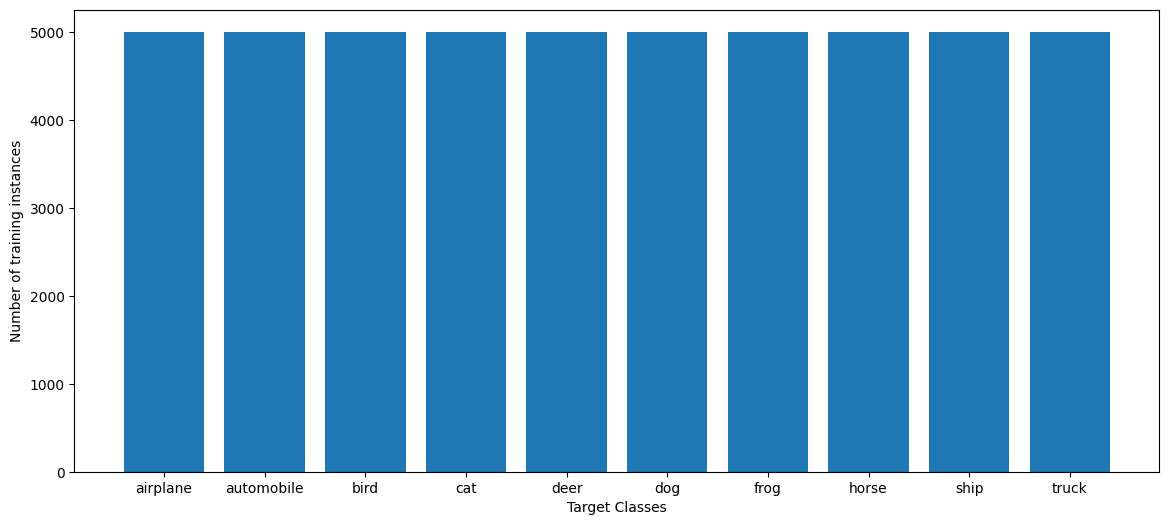

In [ ]:
#Iterating over the training dataset and storing the target class for each sample
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data
    classes.extend(y.tolist())

#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(test_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")

In [ ]:
class CNN(torch.nn.Module):
	def __init__(self):
		super().__init__()
		# --- Conv layer Set 1
		self.l1_conv = torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1) # 3 * 32 * 32 ----> Conv2D : 32c3w1s1p ---->
		self.l1_relu = torch.nn.ReLU()    #  ----> ReLU --->
		self.l1_maxpool = torch.nn.MaxPool2d(kernel_size=2) # ----> Maxpool2D : 2w1s0p --->
		# --- Conv layer Set 2
		self.l2_conv = torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1)   #  ----> Conv2D : 64c3w1s1p ---->
		self.l2_relu = torch.nn.ReLU()		#     ----> ReLU --->
		self.l2_maxpool = torch.nn.MaxPool2d(kernel_size=2) #    ----> Maxpool2D : 2w1s0p --->
		# --- Conv layer Set 3
		self.l3_conv = torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1)	#  ----> Conv2D : 64c3w1s1p ---->
		self.l3_relu = torch.nn.ReLU()				#     ----> ReLU --->
		self.l3_maxpool = torch.nn.MaxPool2d(kernel_size=2)		#    ----> Maxpool2D : 2w1s0p --->
		# --- FCL
		self.fc_flat = torch.nn.Flatten()			# ------> Flatten ----->
		self.fc_lin1 = torch.nn.Linear(64*4*4, 512)		#  ---------> Linear(512) ------>
		self.fc_relu = torch.nn.ReLU()                #  ---------> ReLu ------->
		self.fc_lin2 = torch.nn.Linear(512, 10)				# ----------> Linear(10) ------>
	def forward(self, x):
		# --- Conv layer Set 1
		x = self.l1_conv(x)
		x = self.l1_relu(x)
		x = self.l1_maxpool(x)
		# ---- Conv layer Set 2
		x = self.l2_conv(x)
		x = self.l2_relu(x)
		x = self.l2_maxpool(x)
		# ---- Conv layer Set 3
		x = self.l3_conv(x)
		x = self.l3_relu(x)
		x = self.l3_maxpool(x)
		# FC layer
		x = self.fc_flat(x)
		x = self.fc_lin1(x)
		x = self.fc_relu(x)
		x = self.fc_lin2(x)
		return x

from torchsummary import summary
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_to_analyse = CNN().to(device)
print(model_to_analyse)

summary(model_to_analyse, (3, 32, 32))

CNN(
  (l1_conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (l1_relu): ReLU()
  (l1_maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (l2_conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (l2_relu): ReLU()
  (l2_maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (l3_conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (l3_relu): ReLU()
  (l3_maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_flat): Flatten(start_dim=1, end_dim=-1)
  (fc_lin1): Linear(in_features=1024, out_features=512, bias=True)
  (fc_relu): ReLU()
  (fc_lin2): Linear(in_features=512, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-

Epoch 1/20: Training loss = 1.4336240608673876
Epoch 2/20: Training loss = 1.0100976670794475
Epoch 3/20: Training loss = 0.826211955541235
Epoch 4/20: Training loss = 0.70334711518434
Epoch 5/20: Training loss = 0.6004500709226369
Epoch 6/20: Training loss = 0.5153507216049887
Epoch 7/20: Training loss = 0.4386779916713305
Epoch 8/20: Training loss = 0.36044477699967603
Epoch 9/20: Training loss = 0.29218674822689017
Epoch 10/20: Training loss = 0.22672531068744256
Epoch 11/20: Training loss = 0.18096204387867237
Epoch 12/20: Training loss = 0.13805295411697435
Epoch 13/20: Training loss = 0.1122218656884816
Epoch 14/20: Training loss = 0.0934554925879173
Epoch 15/20: Training loss = 0.08145927674973102
Epoch 16/20: Training loss = 0.07544216836619255
Epoch 17/20: Training loss = 0.07812701439356332
Epoch 18/20: Training loss = 0.07295239671035801
Epoch 19/20: Training loss = 0.053714008574300184
Epoch 20/20: Training loss = 0.07096389369548434


Text(0, 0.5, 'Training loss')

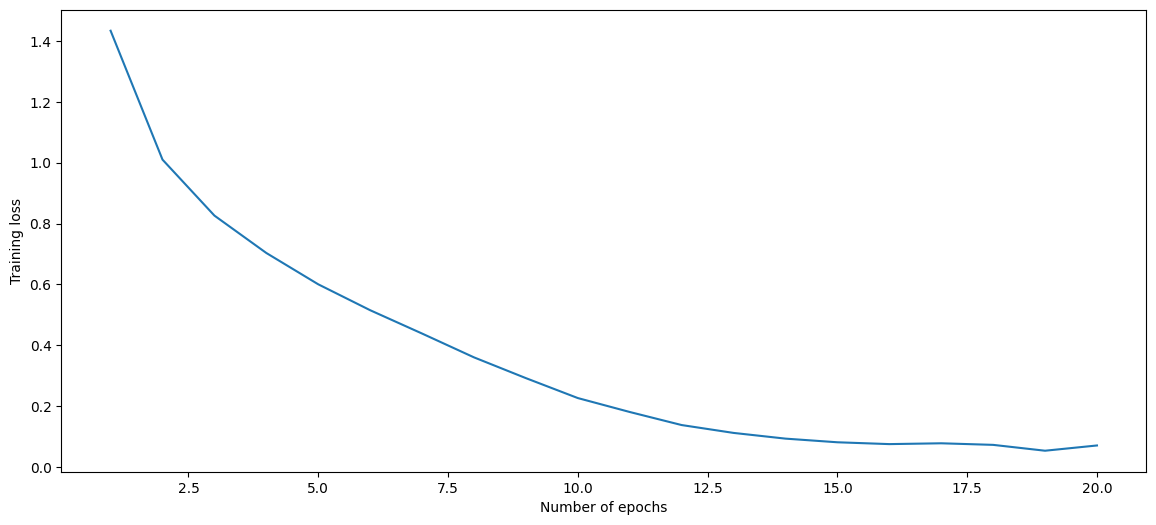

In [ ]:
#Selecting the appropriate training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

#Defining the model hyper parameters
num_epochs = 20
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
	print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
	train_loss = 0

	#Iterating over the training dataset in batches
	model.train()
	for i, (images, labels) in enumerate(train_loader):

		#Extracting images and target labels for the batch being iterated
		images = images.to(device)
		labels = labels.to(device)

		#Calculating the model output and the cross entropy loss
		outputs = model(images)
		loss = criterion(outputs, labels)

		#Updating weights according to calculated loss
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		train_loss += loss.item()

	#Printing loss for each epoch
	train_loss_list.append(train_loss/len(train_loader))
	print(f"Training loss = {train_loss_list[-1]}")

#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


In [ ]:
test_acc=0
model.eval()

with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):

        images = images.to(device)
        y_true = labels.to(device)

        #Calculating outputs for the batch being iterated
        outputs = model(images)

        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)

        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 74.07 %


(-0.5, 165.5, 33.5, -0.5)

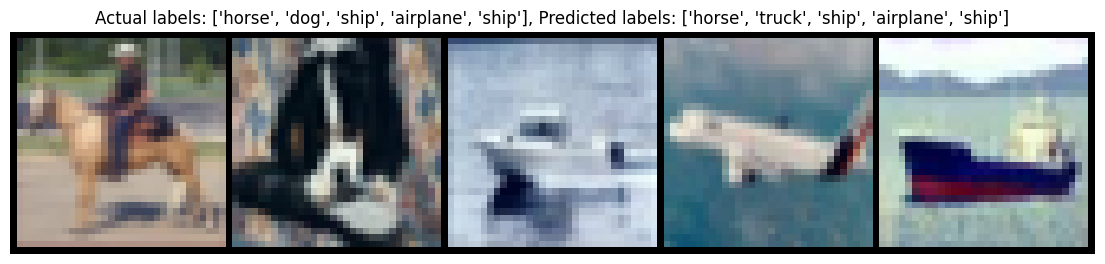

In [ ]:

#Generating predictions for 'num_images' amount of images from the last batch of test set
num_images = 5
y_true_name = [names[y_true[idx]] for idx in range(num_images)]
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)]

#Generating the title for the plot
title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"

#Finally plotting the images with their actual and predicted labels in the title
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:num_images].cpu(), normalize=True, padding=1).numpy(), (1, 2, 0)))
plt.title(title)
plt.axis("off")


In [ ]:
import torch
import torch.nn as nn


class block(nn.Module):
    def __init__(
        self, in_channels, intermediate_channels, identity_downsample=None, stride=1
    ):
        super().__init__()
        self.expansion = 4
        self.conv1 = nn.Conv2d(
            in_channels,
            intermediate_channels,
            kernel_size=1,
            stride=1,
            padding=0,
            bias=False,
        )
        self.bn1 = nn.BatchNorm2d(intermediate_channels)
        self.conv2 = nn.Conv2d(
            intermediate_channels,
            intermediate_channels,
            kernel_size=3,
            stride=stride,
            padding=1,
            bias=False,
        )
        self.bn2 = nn.BatchNorm2d(intermediate_channels)
        self.conv3 = nn.Conv2d(
            intermediate_channels,
            intermediate_channels * self.expansion,
            kernel_size=1,
            stride=1,
            padding=0,
            bias=False,
        )
        self.bn3 = nn.BatchNorm2d(intermediate_channels * self.expansion)
        self.relu = nn.ReLU()
        self.identity_downsample = identity_downsample
        self.stride = stride

    def forward(self, x):
        identity = x.clone()

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)

        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)

        x += identity
        x = self.relu(x)
        return x


class ResNet(nn.Module):
    def __init__(self, block, layers, image_channels, num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(
            image_channels, 64, kernel_size=7, stride=2, padding=3, bias=False
        )
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Essentially the entire ResNet architecture are in these 4 lines below
        self.layer1 = self._make_layer(
            block, layers[0], intermediate_channels=64, stride=1
        )
        self.layer2 = self._make_layer(
            block, layers[1], intermediate_channels=128, stride=2
        )
        self.layer3 = self._make_layer(
            block, layers[2], intermediate_channels=256, stride=2
        )
        self.layer4 = self._make_layer(
            block, layers[3], intermediate_channels=512, stride=2
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * 4, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, num_residual_blocks, intermediate_channels, stride):
        identity_downsample = None
        layers = []

        # Either if we half the input space for ex, 56x56 -> 28x28 (stride=2), or channels changes
        # we need to adapt the Identity (skip connection) so it will be able to be added
        # to the layer that's ahead
        if stride != 1 or self.in_channels != intermediate_channels * 4:
            identity_downsample = nn.Sequential(
                nn.Conv2d(
                    self.in_channels,
                    intermediate_channels * 4,
                    kernel_size=1,
                    stride=stride,
                    bias=False,
                ),
                nn.BatchNorm2d(intermediate_channels * 4),
            )

        layers.append(
            block(self.in_channels, intermediate_channels, identity_downsample, stride)
        )

        # The expansion size is always 4 for ResNet 50,101,152
        self.in_channels = intermediate_channels * 4

        # For example for first resnet layer: 256 will be mapped to 64 as intermediate layer,
        # then finally back to 256. Hence no identity downsample is needed, since stride = 1,
        # and also same amount of channels.
        for i in range(num_residual_blocks - 1):
            layers.append(block(self.in_channels, intermediate_channels))

        return nn.Sequential(*layers)


def ResNet50(img_channel=3, num_classes=1000):
    return ResNet(block, [3, 4, 6, 3], img_channel, num_classes)


def ResNet101(img_channel=3, num_classes=1000):
    return ResNet(block, [3, 4, 23, 3], img_channel, num_classes)


def ResNet152(img_channel=3, num_classes=1000):
    return ResNet(block, [3, 8, 36, 3], img_channel, num_classes)


def test():
    BATCH_SIZE = 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = ResNet101(img_channel=3, num_classes=1000).to(device)
    y = net(torch.randn(BATCH_SIZE, 3, 224, 224).to(device))
    assert y.size() == torch.Size([BATCH_SIZE, 1000])
    print(y.size())


if __name__ == "__main__":
    test()

torch.Size([4, 1000])


In [ ]:
from torchsummary import summary
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_to_analyse = ResNet101().to(device)
print(model_to_analyse)

summary(model_to_analyse, (3, 32, 32))

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): block(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (identity_downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1/20: Training loss = 2.627753978799981
Epoch 2/20: Training loss = 1.6225684228760506
Epoch 3/20: Training loss = 1.397490078835841
Epoch 4/20: Training loss = 1.2285211296642529
Epoch 5/20: Training loss = 1.0735482105513667
Epoch 6/20: Training loss = 0.9458548185770469
Epoch 7/20: Training loss = 0.8405966363904421
Epoch 8/20: Training loss = 0.7938600835745292
Epoch 9/20: Training loss = 0.7028249970177556
Epoch 10/20: Training loss = 0.6326396961498748
Epoch 11/20: Training loss = 0.5635022659740789
Epoch 12/20: Training loss = 0.5132778922615149
Epoch 13/20: Training loss = 0.4804011260533272
Epoch 14/20: Training loss = 0.42158329799352096
Epoch 15/20: Training loss = 0.38836504164559155
Epoch 16/20: Training loss = 0.345161336157328
Epoch 17/20: Training loss = 0.3195370745933269
Epoch 18/20: Training loss = 0.29481760037067295
Epoch 19/20: Training loss = 0.43579373167603824
Epoch 20/20: Training loss = 0.24191601694468648


Text(0, 0.5, 'Training loss')

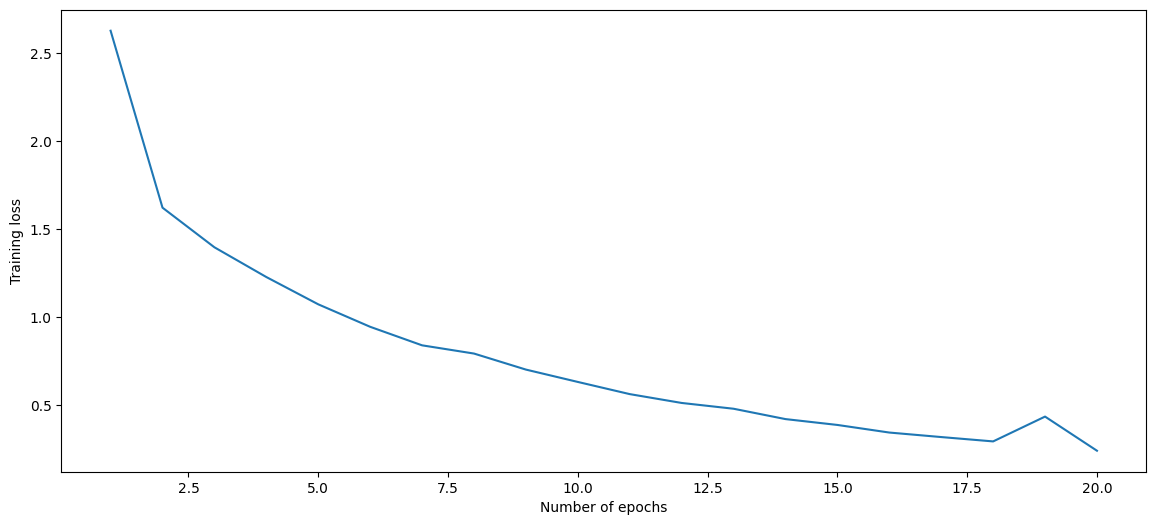

In [ ]:
#Selecting the appropriate training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet101().to(device)

#Defining the model hyper parameters
num_epochs = 20
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
	print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
	train_loss = 0

	#Iterating over the training dataset in batches
	model.train()
	for i, (images, labels) in enumerate(train_loader):

		#Extracting images and target labels for the batch being iterated
		images = images.to(device)
		labels = labels.to(device)

		#Calculating the model output and the cross entropy loss
		outputs = model(images)
		loss = criterion(outputs, labels)

		#Updating weights according to calculated loss
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		train_loss += loss.item()

	#Printing loss for each epoch
	train_loss_list.append(train_loss/len(train_loader))
	print(f"Training loss = {train_loss_list[-1]}")

#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


Test set accuracy = 73.71 %


(-0.5, 165.5, 33.5, -0.5)

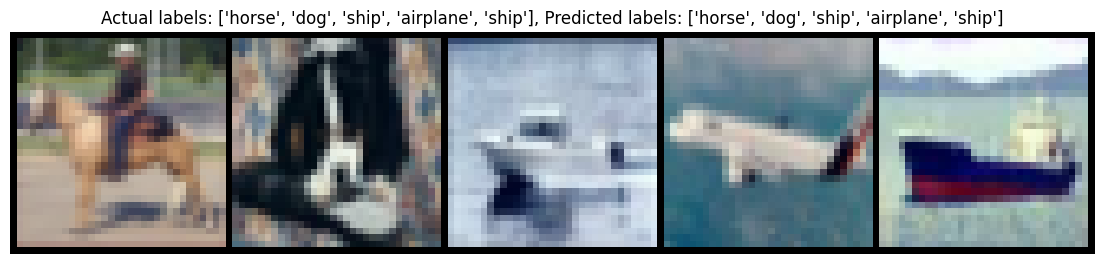

In [ ]:
test_acc = 0
model.eval()

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):

        images = images.to(device)
        y_true = labels.to(device)

        outputs = model(images)

        _, y_pred = torch.max(outputs.data, 1)

        test_acc += (y_pred == y_true).sum().item()

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

num_images = 5
y_true_name = [names[y_true[idx]] for idx in range(num_images)]
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)]

title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"

plt.imshow(np.transpose(torchvision.utils.make_grid(images[:num_images].cpu(), normalize=True, padding=1).numpy(), (1, 2, 0)))
plt.title(title)
plt.axis("off")

In [ ]:
# from torchvision import utils

# def visTensor(tensor, ch=0, allkernels=False, nrow=16, padding=1, normalize=True):
#   print(tensor.shape)
#   n,c,w,h = tensor.shape
#   if allkernels: tensor = tensor.view(n*c, -1, w, h)
#   elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
#   rows = np.min((tensor.shape[0] // nrow + 1, 64))
#   grid = utils.make_grid(tensor, nrow=nrow, normalize=normalize, padding=padding)
#   #plt.figure( figsize=(nrow,rows) )
#   #plt.imshow(grid.numpy().transpose((1, 2, 0)))

# print(model)

# for name, param in model.named_parameters():
#   # print(name, param)
#   if 'conv' in name.lower() and 'weight' in name.lower(): #and '3' in name.lower():  # Getting convolution filters only
#     print(name)
#     visTensor(param.detach().cpu(), ch=0, allkernels=True)
#     plt.axis('off')
#     #plt.ioff()
#     #plt.show()



In [ ]:
def return_layer_input_output(model, inputs):

    with torch.no_grad():
        activation = {}
        input_lr = {}

        def get_activation(name):
            def hook(model, input, output):
                activation[name] = output.detach()
                input_lr[name] = input[0].detach()

            return hook

        layer_name = []
        for name, layer in model.named_modules():
            if not ("." in name):
                layer.register_forward_hook(get_activation(name))
                layer_name.append(name)
        output = model(inputs.detach()).detach()
        # Removing the hook or else it will add a overhead
        for name, layer in model.named_modules():
            if not ("." in name):
                layer.register_forward_hook(get_activation(name)).remove()
    return layer_name, input_lr, activation


In [ ]:
def show_image(subset_indices, test_dataset):
  subset = torch.utils.data.Subset(test_dataset, subset_indices)
  testloader_subset = torch.utils.data.DataLoader(subset, batch_size=1, num_workers=0, shuffle=False)
  dataiter_subset = iter(testloader_subset)
  images, labels = next(dataiter_subset)
  print(images.size())
  plt.imshow(np.transpose(torchvision.utils.make_grid(
    images, normalize=True, padding=1, nrow=1).numpy(), (1, 2, 0)))
  plt.axis('off')
  plt.show()
  print(f"Actual labels: {names[labels]}")
  return images, labels

In [ ]:
def visualize_feature_map(model, images, labels):
  layer_name, input_lr, activation = return_layer_input_output(model.cpu(), images.detach().cpu())
  # print(activation)
  for name in layer_name:
    if 'l1' in name.lower() or 'l2' in name.lower() or 'l3' in name.lower():
      if 'relu' in name.lower():
        print(name)
        #visTensor(activation.get(name).detach().cpu(), ch=0, allkernels=True, normalize=True)
        plt.axis('off')
        plt.ioff()
        plt.show()


  outputs = model(images)

  #Calculated prediction labels from models
  _, y_pred = torch.max(outputs.data, 1)
  y_true = labels

  print(f"Actual labels: {names[y_true]}, Predicted labels: {names[y_pred]}")

torch.Size([1, 3, 32, 32])


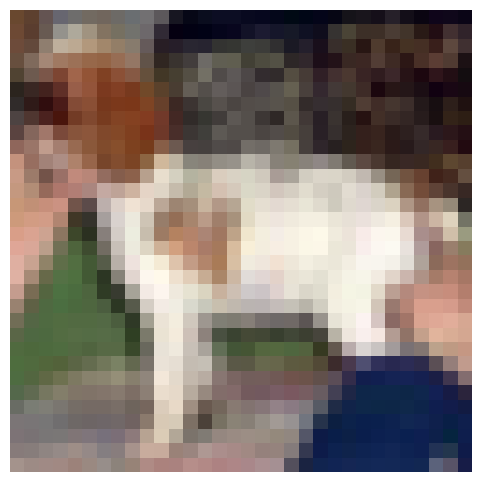

Actual labels: dog


In [ ]:
subset_indices = [12] # select your indices here as a list
image, label = show_image(subset_indices, test_dataset)

In [ ]:
visualize_feature_map(model, image, label)

Actual labels: dog, Predicted labels: deer


torch.Size([1, 3, 32, 32])


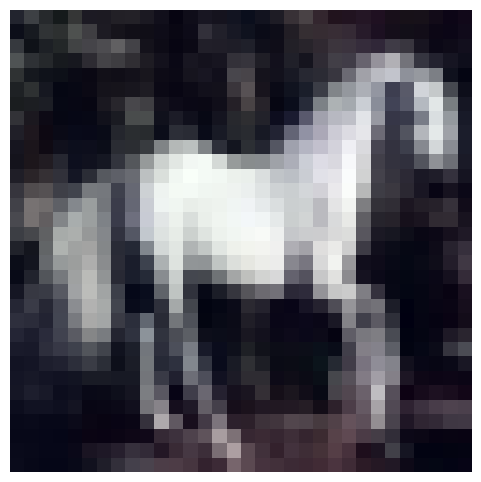

Actual labels: horse


In [ ]:
subset_indices = [13] # select your indices here as a list
image, label = show_image(subset_indices, test_dataset)

In [ ]:
visualize_feature_map(model, image, label)

Actual labels: horse, Predicted labels: horse


In [ ]:
def saliency_map(images):
  # we would run the model in evaluation mode
  X = images
  model.eval()

  # we need to find the gradient with respect to the input image, so we need to call requires_grad_ on it
  X.requires_grad_()

  scores = model(X)

  # Get the index corresponding to the maximum score and the maximum score itself.
  score_max_index = scores.argmax()
  score_max = scores[0,score_max_index]

  score_max.backward()

  saliency, _ = torch.max(X.grad.data.abs(),dim=1)

  # Create a new figure with two subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # Adjust the figure size

  # Display the original image on the left subplot
  ax1.imshow(np.transpose(torchvision.utils.make_grid(
    images, normalize=True, padding=0, nrow=1).numpy(), (1, 2, 0))
  )
  ax1.set_axis_off()

  # Display the saliency map as a heatmap on the right subplot
  ax2.imshow(saliency[0], cmap=plt.cm.hot)
  ax2.set_axis_off()

  plt.subplots_adjust(wspace=0)  # Remove space between subplots
  plt.show()

torch.Size([1, 3, 32, 32])


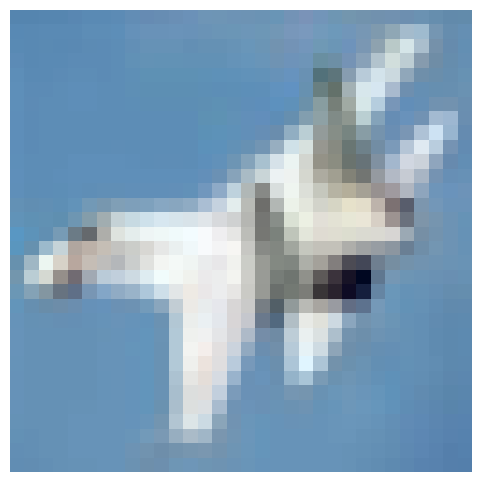

Actual labels: airplane


In [ ]:
subset_indices = [10] # select your indices here as a list
image, label = show_image(subset_indices, test_dataset)

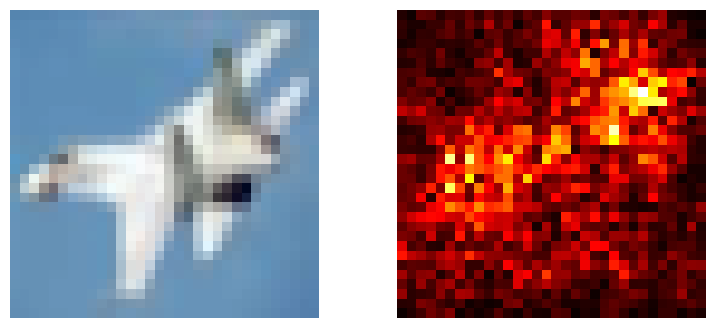

In [ ]:
saliency_map(image)

torch.Size([1, 3, 32, 32])


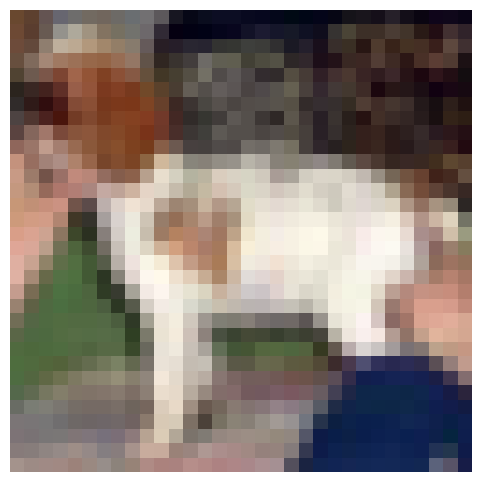

Actual labels: dog


In [ ]:
subset_indices = [12] # select your indices here as a list
image, label = show_image(subset_indices, test_dataset)

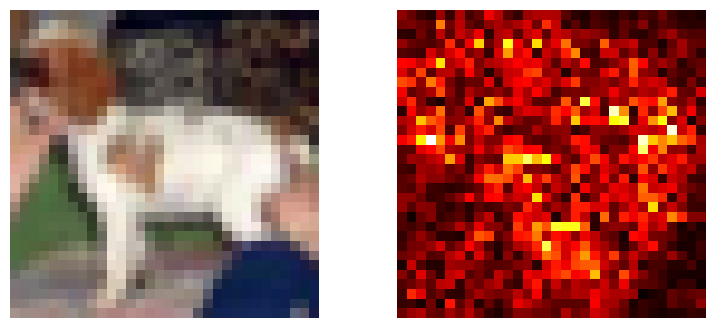

In [ ]:
saliency_map(image)